# Linear Regression for Finance


This notebook uses linear regression to predict Royal Dutch Shell's quarterly revenue based on the price of Brent crude. The dataset includes Shell's quarterly revenue from 2005 to 2019. The quarterly value of Brent is accessed from Quandl. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

import quandl
from quandl_config import QUANDL_API_KEY # file with my personal Quandl Key

df = pd.read_csv('shell financial data.csv')
df.set_index("Date", inplace=True)

In [2]:
start_date = datetime.datetime(2005, 3, 31)

symbols = {
        "Brent": "FRED/DCOILBRENTEU",
        "Henry_Hub": "CHRIS/CME_NG1"
        }

Brent = quandl.get(symbols['Brent'], start = start_date,  api_key = QUANDL_API_KEY, collapse = 'quarterly')

df_merged = pd.merge(df, Brent, left_index = True, right_index= True)

In [3]:
# Values in millions of USD except per share data

df_merged.head()

,Revenue,Cost Of Goods Sold,Gross Profit,Research And Development Expenses,SG&A Expenses,Other Operating Income Or Expenses,Operating Expenses,Operating Income,Total Non-Operating Income,Pre-Tax Income,...,Income From Continuous Operations,Income From Discontinued Operations,Net Income,EBITDA,EBIT,Basic Shares Outstanding,Shares Outstanding,Basic EPS,EPS - Earnings Per Share,Value
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-31,72156.0,58826.0,13330.0,NaN,3539.0,NaN,62365.0,9791.0,1503.0,11294.0,...,7020.0,-214.0,6675.0,12946.0,9791.0,3371.212,3371.212,1.98,1.98,53.22
2005-06-30,82644.0,69712.0,12932.0,NaN,3917.0,NaN,73629.0,9015.0,1041.0,10056.0,...,5461.0,NaN,5236.0,12151.0,9015.0,3356.410,3356.410,1.56,1.56,55.36
2005-09-30,76435.0,60979.0,15456.0,NaN,3763.0,NaN,64742.0,11693.0,3349.0,15042.0,...,9484.0,-93.0,9032.0,14596.0,11693.0,3345.185,3345.185,2.70,2.70,61.70
2005-12-31,75496.0,64391.0,11105.0,NaN,4263.0,NaN,68654.0,6842.0,1333.0,8175.0,...,4603.0,NaN,4368.0,9629.0,6842.0,3339.182,3348.016,1.34,1.32,58.34
2006-03-31,75964.0,62203.0,13761.0,NaN,3413.0,NaN,65616.0,10348.0,1978.0,12326.0,...,7016.0,NaN,6893.0,13160.0,10348.0,3434.434,3282.381,2.12,2.10,66.06


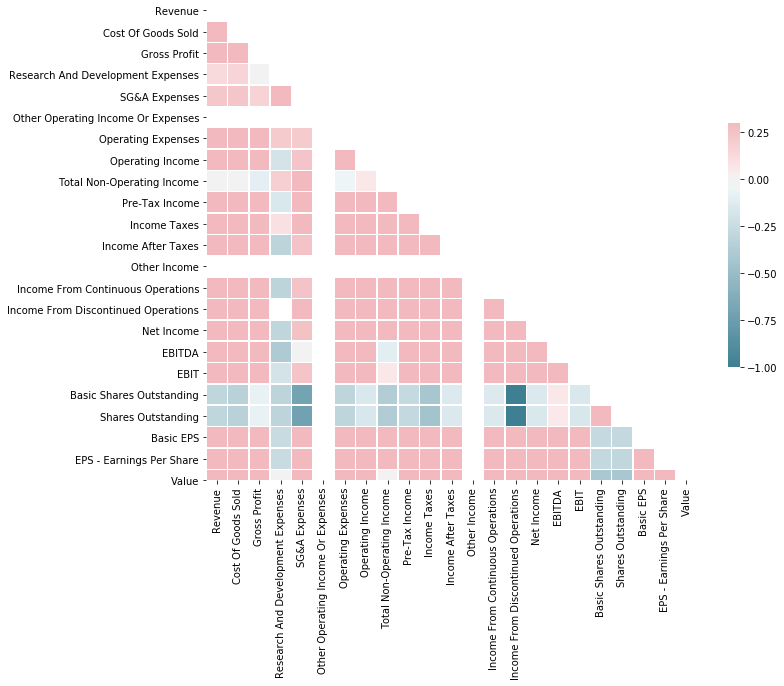

In [4]:
# Correlation matrix and heatmap

# Compute the correlation matrix for all columns
corr = df_merged.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
# Testing the correlation between Revenue and Brent
# Correlation is a value in range [-1, 1]

df_merged[['Revenue', 'Value']].corr()

,Revenue,Value
Revenue,1.000000,0.900632
Value,0.900632,1.000000


In [6]:
# Linear Regression using StatsModels

Y = df_merged['Revenue']
X = df_merged['Value']
X = sm.add_constant(X)
model_1 = sm.OLS(Y, X).fit()
model_1.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     244.8
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.73e-22
Time:                        10:11:16   Log-Likelihood:                -622.43
No. Observations:                  59   AIC:                             1249.
Df Residuals:                      57   BIC:                             1253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.358e+04   3949.222      8.504      0.000    2.57e+04    4.15e+04
Value        766.6843     49.001     15.646      0.000     668.562     864.807
==============================================================================
Omnibus:                       17.233   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.874
Skew:                           1.077   Prob(JB):                     6.55e-06
Kurtosis:                       5.252   Cond. No.                         260.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Regression using R syntax from StatsModels

import statsmodels.formula.api as smf
    
model = smf.ols(formula='Revenue ~ Value', data=df_merged).fit()

print(model.summary())
print("\n Interpretation of the model: \n A $1 increase in Brent is associated with a ${:,.2f} increase in Quarterly Revenue.".format(model.params[1]*1000000))

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     244.8
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.73e-22
Time:                        10:11:16   Log-Likelihood:                -622.43
No. Observations:                  59   AIC:                             1249.
Df Residuals:                      57   BIC:                             1253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.358e+04   3949.222      8.504      0.0

Text(0.5, 1.0, 'Linear Regression')

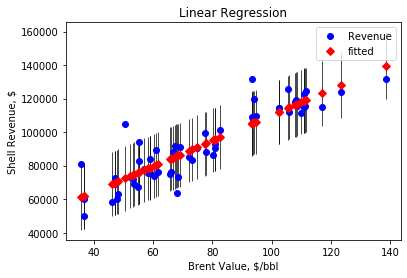

In [8]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, "Value", ax=ax)
ax.set_ylabel("Shell Revenue, $")
ax.set_xlabel("Brent Value, $/bbl")
ax.set_title("Linear Regression")

# Further analysis

This model could be extended using other features to predict Revenue such as the price of other commodities or economic indicators like the S&P 500 index.

In [9]:
# Same analysis adding S&P 500

SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH", start = start_date,  api_key = QUANDL_API_KEY, collapse = 'quarterly')

df_merged = pd.merge(df_merged, SP500, left_index = True, right_index= True)
rename = {"Value_x": "Brent_Value", "Value_y": "SP500_Value"}
df_merged.rename(rename, axis = 1, inplace = True)

In [10]:
model_sp500 = smf.ols(formula='Revenue ~ Brent_Value + SP500_Value', data=df_merged).fit()

print(model_sp500.summary())
print("\n Interpretation of the model: \n A $1 increase in Brent is associated with a ${:,.2f} increase in Quarterly Revenue.".format(model_sp500.params[1]*1000000))

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           1.25e-21
Time:                        10:11:18   Log-Likelihood:                -620.89
No. Observations:                  59   AIC:                             1248.
Df Residuals:                      56   BIC:                             1254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.559e+04   6031.365      4.243      

In [17]:
print("""Note that the R_squared value in the SP500 model is not much better than the R_squared value in the Brent-only model, indicating that the multivariate model does not explain more of the variance in Revenue than the bivariate model. Following the principle of parsimony, one would use the Brent-only model.""")
print("""\t R_squared for Brent-only model: \t {Brent:.3f}
      \t R_squared for Brent+SP500 model: \t {SP500:.3f}""".format(Brent=model.rsquared, SP500=model_sp500.rsquared))

Note that the R_squared value in the SP500 model is not much better than the R_squared value in the Brent-only model, indicating that the multivariate model does not explain more of the variance in Revenue than the bivariate model. Following the principle of parsimony, one would use the Brent-only model.
	 R_squared for Brent-only model: 	 0.811
      	 R_squared for Brent+SP500 model: 	 0.821
